<a href="https://colab.research.google.com/github/skywalker0803r/ESun2021WinterGame/blob/main/Proof_of_Concept/%E5%88%A9%E7%94%A8apply%E5%8F%96%E4%BB%A3for%E8%BF%B4%E5%9C%88%E4%BE%86%E5%8A%A0%E9%80%9F%E9%81%8B%E7%AE%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
tqdm.pandas()

size = 10000
df = pd.DataFrame()
df['dt'] = np.random.randint(0,25,size=size)
df['chid'] = np.random.randint(10000,10000+500,size=size)
df['shop_tag'] = np.random.randint(0,5,size=size)
df = df.sort_values(by='dt')
df

,dt,chid,shop_tag
4089,0,10081,1
1179,0,10475,1
4257,0,10066,4
4236,0,10085,2
6846,0,10118,0
...,...,...,...
3208,24,10049,1
1614,24,10461,1
1616,24,10061,0
1643,24,10285,4


In [125]:
chid = df.loc[1,'chid']
dt = df.loc[1,'dt']
cond = (df.dt>=dt)&(df.chid==chid)
df.loc[cond]

,dt,chid,shop_tag
1,6,10146,4
6414,7,10146,1
6799,8,10146,3
3978,9,10146,4
5399,10,10146,1
5477,12,10146,3
7843,14,10146,2
7986,19,10146,2
5911,19,10146,2
9399,19,10146,1


In [126]:
df.loc[cond,'shop_tag'].value_counts()

1    5
2    4
4    3
0    3
3    2
Name: shop_tag, dtype: int64

In [127]:
s = time.time()
answer_list = []
for idx in tqdm(df.index):
  cond = (df.dt>=14)&(df.chid==df.loc[idx,'chid'])
  answer = df.loc[cond,'shop_tag'].value_counts()[:3].index.tolist()
  if len(answer) == 3:
    answer_list.append(answer)
  else:
    remain = 3-len(answer)
    for _ in range(remain):
      answer.append(np.random.choice([0,1,2,3,4]))
    assert len(answer) == 3
    answer_list.append(answer)
answer_list = np.array(answer_list)
df['top1'] = answer_list[:,0]
df['top2'] = answer_list[:,1]
df['top3'] = answer_list[:,2]
df
for_cost_t = time.time() - s

100%|██████████| 10000/10000 [00:14<00:00, 684.59it/s]


In [128]:
print(for_cost_t)
df

14.628188848495483


,dt,chid,shop_tag,top1,top2,top3
4089,0,10081,1,2,4,1
1179,0,10475,1,4,2,1
4257,0,10066,4,0,4,3
4236,0,10085,2,0,4,3
6846,0,10118,0,0,4,3
...,...,...,...,...,...,...
3208,24,10049,1,0,4,2
1614,24,10461,1,3,2,1
1616,24,10061,0,2,1,0
1643,24,10285,4,3,1,0


In [129]:
s = time.time()
def f(chid):
  global pbar
  pbar.update(1)
  cond = (df.dt>=14)&(df.chid==chid)
  answer = df.loc[cond,'shop_tag'].value_counts()[:3].index.tolist()
  if len(answer) == 3:
    return answer
  else:
    remain = 3-len(answer)
    for _ in range(remain):
      answer.append(np.random.choice([0,1,2,3,4]))
    assert len(answer) == 3
    return answer
answer_list = df['chid'].progress_apply(f)
answer_list = answer_list.to_frame()['chid']
df['top1'] = answer_list.apply(lambda x:x[0]).values
df['top2'] = answer_list.apply(lambda x:x[1]).values
df['top3'] = answer_list.apply(lambda x:x[2]).values
df
apply_cost_t = time.time() - s

100%|██████████| 10000/10000 [00:14<00:00, 710.37it/s]


In [130]:
print(apply_cost_t)
df

14.103428602218628


,dt,chid,shop_tag,top1,top2,top3
4089,0,10081,1,2,4,1
1179,0,10475,1,4,2,1
4257,0,10066,4,0,4,3
4236,0,10085,2,0,4,3
6846,0,10118,0,0,4,3
...,...,...,...,...,...,...
3208,24,10049,1,0,4,2
1614,24,10461,1,3,2,1
1616,24,10061,0,2,1,0
1643,24,10285,4,3,1,0


<BarContainer object of 2 artists>

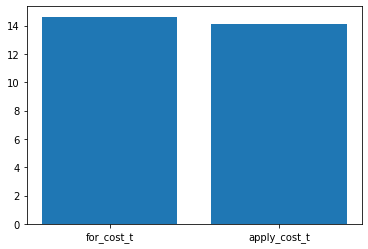

In [141]:
plt.bar(x=['for_cost_t','apply_cost_t'],height=[for_cost_t,apply_cost_t])